In [7]:
import os
import sys
import shutil

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [8]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from BuildingOccupancy import Person, Meeting, WeeklyMeeting, OneTimeMeeting, BuildingOccupancy
from DefaultBuildings import Building_5ZoneAirCooled
from Agents import agent_constructor
from CentralController import ddpg_episode_mc
import RLCritics
import StateUtilities as SU

In [12]:
no_epochs = 1
dirname = '../scripts/checkpoints/001-20210308-1946'

In [13]:
epoch_list = [ None for _ in range(no_epochs)]
for fname in os.listdir(dirname):
    if fname == "building_occ.pickle":
        f = open(f"{dirname}/{fname}","rb")
        building_occ = pickle.load(f)
        f.close()
    elif fname.endswith("_output_lists.pickle"):
        epoch_nr = int(fname.split("_")[1])
        f = open(f"{dirname}/{fname}","rb")
        epoch_list[epoch_nr] = pickle.load(f)
        f.close()

In [16]:
output_lists = epoch_list[0]

In [17]:
timestamp_list = output_lists["timestamp_list"]
episode_list   = output_lists["episode_list"]
df_indexes     = [episode_list, timestamp_list]

In [18]:
loss_df = pd.DataFrame(output_lists["loss_list"], index = df_indexes)

In [19]:
room_temp = pd.DataFrame(output_lists["room_temp_list"], index = df_indexes)
humidity  = pd.DataFrame(output_lists["humidity_list"],  index = df_indexes)
co2_ppm   = pd.DataFrame(output_lists["co2_ppm_list"],   index = df_indexes)
energy    = pd.DataFrame(output_lists["energy_list"],    index = df_indexes)
outd_temp = pd.DataFrame(output_lists["outd_temp_list"], index = df_indexes)
outd_humi = pd.DataFrame(output_lists["outd_humi_list"], index = df_indexes)
outd_solar_radi = pd.DataFrame(output_lists["outd_solar_radi_list"], index = df_indexes)
outd_wind_speed = pd.DataFrame(output_lists["outd_wspeed_list"],     index = df_indexes)
outd_wind_dir   = pd.DataFrame(output_lists["outd_wdir_list"],       index = df_indexes)
n_manual_stp_ch = pd.DataFrame(output_lists["n_manual_stp_ch_list"], index = df_indexes)
rewards   = pd.DataFrame(output_lists["rewards_list"],   index = df_indexes)

vav_pos   = pd.DataFrame(output_lists["vav_pos_list"],   index = df_indexes)

In [20]:
occupancy_list_abs = [{k: v["absolute number occupants"] for k,v in d.items() } for d in output_lists["occupancy_list"]]
occupancy_list_rel = [{k: v["relative number occupants"] for k,v in d.items() } for d in output_lists["occupancy_list"]]
occupancy_list_meanT = [{k: v["mean comfort temp"] for k,v in d.items() } for d in output_lists["occupancy_list"]]

In [21]:
occupancy_absolute = pd.DataFrame(occupancy_list_abs, index = df_indexes)
occupancy_relative = pd.DataFrame(occupancy_list_rel, index = df_indexes)
occupancy_meantemp = pd.DataFrame(occupancy_list_meanT, index = df_indexes)

<AxesSubplot:title={'center':'Loss'}>

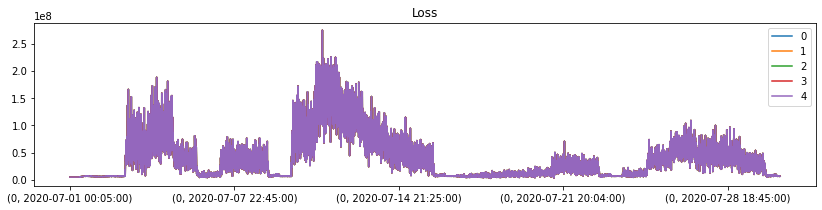

In [22]:
loss_df.plot(title="Loss", figsize=(14,3))

<AxesSubplot:title={'center':'Number of manual setpoint changes'}>

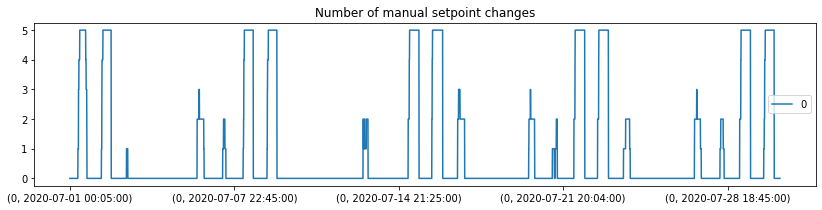

In [23]:
n_manual_stp_ch.plot(title="Number of manual setpoint changes", figsize=(14,3))

<AxesSubplot:title={'center':'Rewards'}>

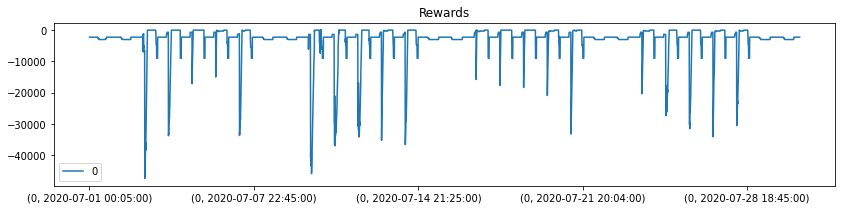

In [24]:
rewards.plot(title="Rewards", figsize=(14,3))